# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values = ['Unknown','UNKNOWN', 'unknown'])
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29469 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3971 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
# Each row is a dog that a New York City resident had a license for as of April 28, 2016. 
# The column 'Owner Zip Code' provides the zip code of the dog-owner. 
# The column 'Animal Name' provides the name of the dog.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [5]:
# Which borough has the most gaurd/trained dogs?
# What are the most popular dog breeds in New York City?
# How old would all of these dogs be now (in human years and dog years)?
# How many dogs in New York City are mixed breeds? How many are just one breed? 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Owner_Zip_Code', 'Animal_Name', 'Animal_Gender', 'Primary_Breed',
       'Secondary_Breed', 'Animal_Dominant_Color', 'Animal_Secondary_Color',
       'Animal_Third_Color', 'Animal_Birth', 'Spayed_or_Neut',
       'Guard_or_Trained', 'Vaccinated', 'Application_Date',
       'License_Issued_Date', 'License_Expired_Date'],
      dtype='object')

<AxesSubplot:title={'center':'Most popular dog breeds in NYC'}>

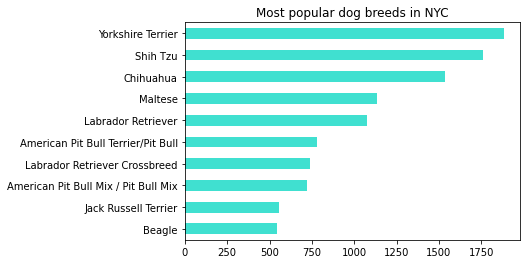

In [7]:
df.Primary_Breed.value_counts().head(10).sort_values().plot(x='Primary_Breed', y=df.Primary_Breed.value_counts(), title='Most popular dog breeds in NYC', kind='barh', color='turquoise')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [8]:
df_known = df.Primary_Breed = df.Primary_Breed.replace({
    'Unknown': np.nan
})
df_known.value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary_Breed, dtype: int64

<AxesSubplot:title={'center':'Most popular dog breeds in NYC'}>

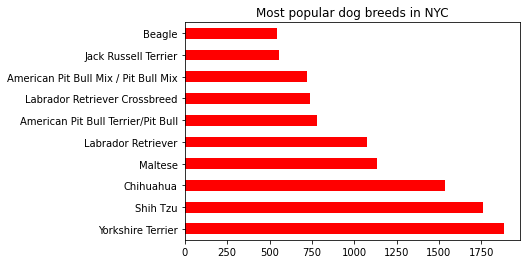

In [9]:
df.Primary_Breed.value_counts().head(10).plot(x='Primary_Breed', y=df.Primary_Breed.value_counts(), title='Most popular dog breeds in NYC', kind='barh', color='red')

## What are the most popular dog names?

In [10]:
df.Animal_Name = df.Animal_Name.str.lower()
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [11]:
df.Animal_Name.value_counts().head()

max        256
bella      236
charlie    207
rocky      171
lola       169
Name: Animal_Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
Max = df.Animal_Name[df.Animal_Name == 'max'].value_counts()
Max

max    256
Name: Animal_Name, dtype: int64

In [13]:
Maxwell = df.Animal_Name[df.Animal_Name == 'maxwell'].value_counts()
Maxwell

maxwell    13
Name: Animal_Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [14]:
df.Guard_or_Trained.value_counts(normalize=True, dropna=False)

No     0.660300
NaN    0.339133
Yes    0.000567
Name: Guard_or_Trained, dtype: float64

## What are the actual numbers?

In [15]:
df.Guard_or_Trained.value_counts()

No     19809
Yes       17
Name: Guard_or_Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [16]:
df.Guard_or_Trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [17]:
df.Guard_or_Trained = df.Guard_or_Trained.replace({
    np.NaN: 'No'
})
df.Guard_or_Trained.value_counts()

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df.Guard_or_Trained == 'Yes'].Primary_Breed.value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary_Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [19]:
df["Year"] = df["Animal_Birth"].apply(lambda birth:birth.year)
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [20]:
df["Age"] = 2021-df['Year']
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,7
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,13
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,7


In [21]:
df.Age.mean()

11.712433333333333

# Joining data together

In [22]:
zips = pd.read_csv("zipcodes-neighborhoods.csv")
zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [23]:
merged = df.merge(zips, how='left', left_on='Owner_Zip_Code', right_on='zip')
merged.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,zip,borough
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024.0,Manhattan
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8,Southeast Bronx,10461.0,Bronx
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,13,Upper West Side,10025.0,Manhattan
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner_Zip_Code          30000 non-null  int64         
 1   Animal_Name             29468 non-null  object        
 2   Animal_Gender           30000 non-null  object        
 3   Primary_Breed           25223 non-null  object        
 4   Secondary_Breed         3971 non-null   object        
 5   Animal_Dominant_Color   29885 non-null  object        
 6   Animal_Secondary_Color  20946 non-null  object        
 7   Animal_Third_Color      6629 non-null   object        
 8   Animal_Birth            30000 non-null  datetime64[ns]
 9   Spayed_or_Neut          30000 non-null  object        
 10  Guard_or_Trained        30000 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application_Date        30000 non-null  dateti

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [25]:
Bronx_popular = merged.Animal_Name[merged.borough == 'Bronx'].value_counts().head()
Bronx_popular

max      31
bella    27
rocky    26
coco     18
lola     16
Name: Animal_Name, dtype: int64

In [26]:
Brooklyn_popular = merged.Animal_Name[merged.borough == 'Brooklyn'].value_counts().head()
Brooklyn_popular

max        64
charlie    56
bella      55
rocky      44
no name    44
Name: Animal_Name, dtype: int64

In [27]:
UES_popular = merged.Animal_Name[merged.neighborhood == 'Upper East Side'].value_counts().head()
UES_popular

charlie    20
bella      14
no name    13
lucy       12
molly      12
Name: Animal_Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [28]:
merged.groupby(by='neighborhood').Primary_Breed.value_counts()

neighborhood  Primary_Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: Primary_Breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [41]:
merged.Primary_Breed[merged.Spayed_or_Neut == 'No'].value_counts().head()

Yorkshire Terrier                     537
Shih Tzu                              405
Chihuahua                             306
Maltese                               306
American Pit Bull Terrier/Pit Bull    173
Name: Primary_Breed, dtype: int64

In [30]:
merged.Animal_Gender[merged.Spayed_or_Neut == 'No'].value_counts().head()

M    3384
F    1953
Name: Animal_Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [43]:
merged['Animal_Dominant_Color'] = merged['Animal_Dominant_Color'].str.lower()
merged['Animal_Secondary_Color'] = merged['Animal_Secondary_Color'].str.lower()
merged['Animal_Third_Color'] = merged['Animal_Third_Color'].str.lower()
colors = ['black', 'white', 'grey', 'gray', np.nan]
merged['monochrome'] = (merged['Animal_Dominant_Color'].isin(colors) & merged['Animal_Secondary_Color'].isin(colors) & merged['Animal_Third_Color'].isin(colors))

In [44]:
merged.monochrome.value_counts()

False    21628
True      8372
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [31]:
number_dogs = merged.borough.value_counts()
number_dogs

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:>

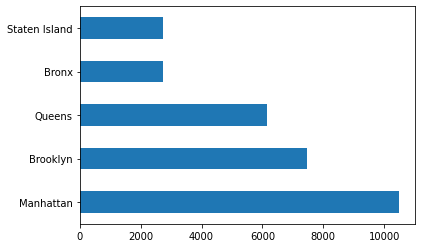

In [32]:
merged.borough.value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [33]:
pop = pd.read_csv("boro_population.csv")
pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [34]:
pop.columns = pop.columns.str.replace('borough','Borough1')
pop.columns

Index(['Borough1', 'population', 'area_sqmi'], dtype='object')

In [35]:
pop.head()

,Borough1,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [36]:
merge_two = merged.merge(pop, left_on='borough', right_on='Borough1')
merge_two.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,...,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,zip,borough,Borough1,population,area_sqmi
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,14,Upper West Side,10024.0,Manhattan,Manhattan,1644518,23
1,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan,Manhattan,1644518,23
2,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12,2017-10-20,2008,13,Upper West Side,10025.0,Manhattan,Manhattan,1644518,23
3,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan,Manhattan,1644518,23
4,10013,queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,...,2014-09-12,2017-09-12,2013,8,Greenwich Village and Soho,10013.0,Manhattan,Manhattan,1644518,23


In [37]:
population = merge_two.groupby(by='borough').population.value_counts()
population

borough        population
Bronx          1455444        2748
Brooklyn       2636735        7466
Manhattan      1644518       10478
Queens         2339150        6154
Staten Island  474558         2727
Name: population, dtype: int64

In [38]:
# merge_two.population[merge_two.borough == 'Manhattan']

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?